In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import os
import glob

# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei'] # 用黑体显示中文

In [35]:
df = pd.read_excel('ss.xlsx').drop(columns='索引')

In [36]:
df

,耕地_p,耕地_t,森林_p,森林_t,草地_p,草地_t,灌木_p,灌木_t,湿地_p,湿地_t,指标
0,0.00,0.000000,0.70,0.160000,43.45,43.400000,50.53,50.930000,5.25,5.490000,降水
1,23.63,23.770000,3.09,1.250000,56.76,59.310000,15.97,15.670000,0.20,0.000000,降水
2,0.01,0.000000,0.28,0.280000,89.99,89.800000,9.90,9.820000,0.09,0.090000,降水
3,0.05,0.050000,6.28,6.300000,73.66,73.360000,18.96,18.330000,1.88,1.940000,降水
4,0.00,0.000000,0.14,0.140000,98.13,93.140000,0.00,0.000000,1.74,1.720000,降水
5,60.58,66.751194,2.50,2.383574,26.34,25.078170,1.43,0.181725,5.79,5.605336,温度
6,62.82,65.854424,7.19,9.292305,23.26,20.117500,5.36,4.330120,2.17,0.405650,温度
7,71.72,77.674353,0.76,0.092125,22.22,21.471983,5.21,0.056803,2.10,0.704737,温度
8,23.29,23.058605,44.82,53.617780,13.15,3.764510,18.54,19.142771,0.43,0.416334,温度
9,39.42,34.839360,3.64,3.972368,25.82,25.279242,24.51,32.060277,4.83,3.848755,温度


In [42]:
df0

,耕地_p,耕地_t,森林_p,森林_t,草地_p,草地_t,灌木_p,灌木_t,湿地_p,湿地_t,指标
0,0.00,0.00,0.70,0.16,43.45,43.40,50.53,50.93,5.25,5.49,降水
1,23.63,23.77,3.09,1.25,56.76,59.31,15.97,15.67,0.20,0.00,降水
2,0.01,0.00,0.28,0.28,89.99,89.80,9.90,9.82,0.09,0.09,降水
3,0.05,0.05,6.28,6.30,73.66,73.36,18.96,18.33,1.88,1.94,降水
4,0.00,0.00,0.14,0.14,98.13,93.14,0.00,0.00,1.74,1.72,降水


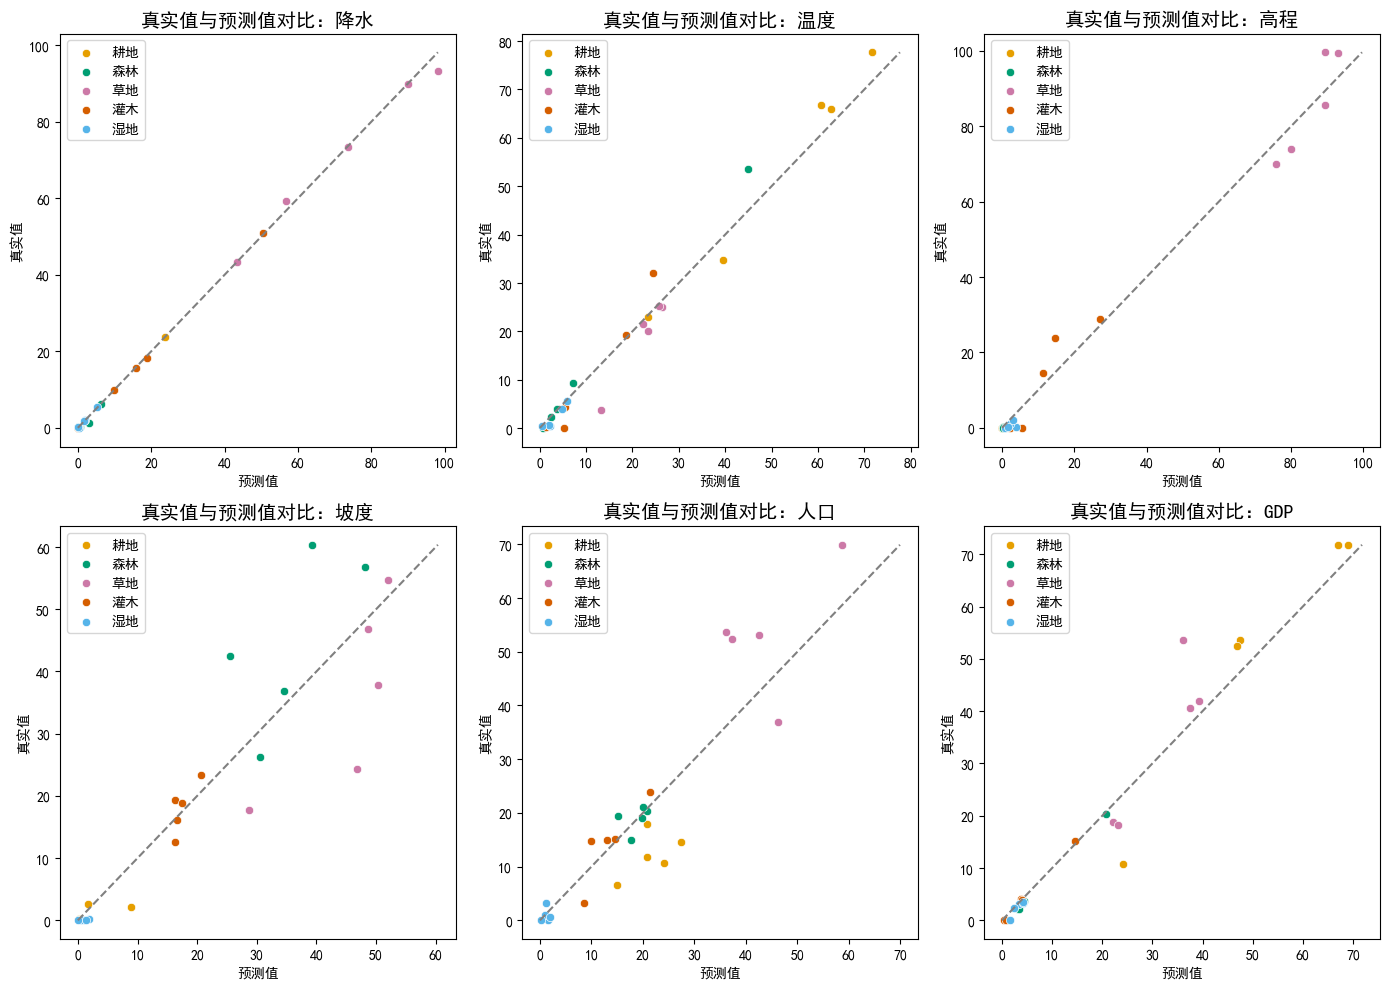

In [53]:
# 获取唯一的指标
indicators = df['指标'].unique()

# 创建一个3x2的子图网格
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

# 确保axes是一个二维数组，即使其中某些元素是None
if not hasattr(axes, 'shape'):
    axes = np.array([axes])

# 遍历每一个指标并绘制相应的散点图
for indicator, ax in zip(indicators, axes.flatten()):
    df0 = df[df['指标'] == indicator].copy().drop(columns='指标')
    for land_type, color in zip(land_types, colors):
        sns.scatterplot(data=df0, x=f'{land_type}_p', y=f'{land_type}_t', color=color, ax=ax, label=land_type)
    
    ax.set_title(f'真实值与预测值对比：{indicator}', fontsize=14)
    ax.set_xlabel('预测值')
    ax.set_ylabel('真实值')
    
    # 在每个子图中绘制y=x参考线
    ax.plot([df0.min().min(), df0.max().max()], 
            [df0.min().min(), df0.max().max()], 
            color='gray', linestyle='--')
    
    ax.legend(fontsize=10)

plt.tight_layout()  # 调整子图布局避免重叠
plt.show()

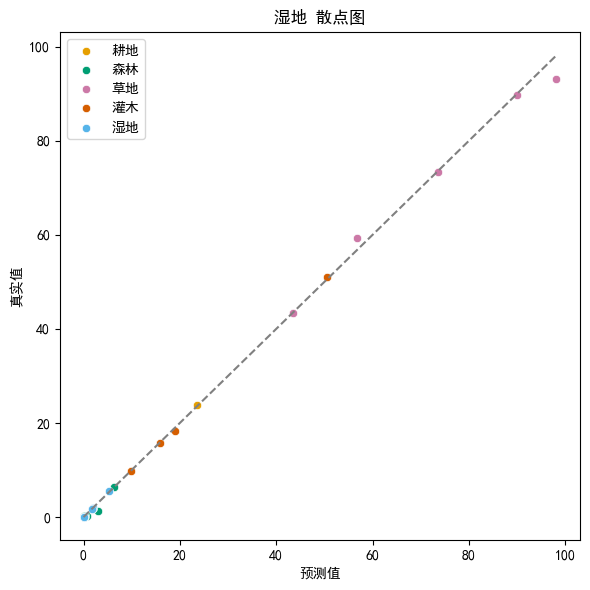

In [34]:
land_types = ['耕地', '森林', '草地', '灌木', '湿地']
colors = ['#E69F00', '#009E73', '#CC79A7', '#D55E00', '#56B4E9']  # 定义颜色列表

# 创建一个画布
plt.figure(figsize=(6, 6))  # 增加宽度以便更好地显示五个子图

# 循环绘制每个地类的散点图
for i, (land_type, color) in enumerate(zip(land_types, colors), start=1):
    sns.scatterplot(data=df, x=f'{land_type}_p', y=f'{land_type}_t', color=color, label=land_type)
    plt.title(f'真实值-预测试散点图')
    plt.xlabel(f'{land_type}_p')
    plt.ylabel(f'{land_type}_t')

plt.plot([df.min().min(), df.max().max()],
         [df.min().min(), df.max().max()],
         color='gray', linestyle='--')  # 绘制 y=x 参考线，改为灰色虚线
plt.xlabel('预测值')
plt.ylabel('真实值')
plt.tight_layout()  # 自动调整子图布局
plt.show()

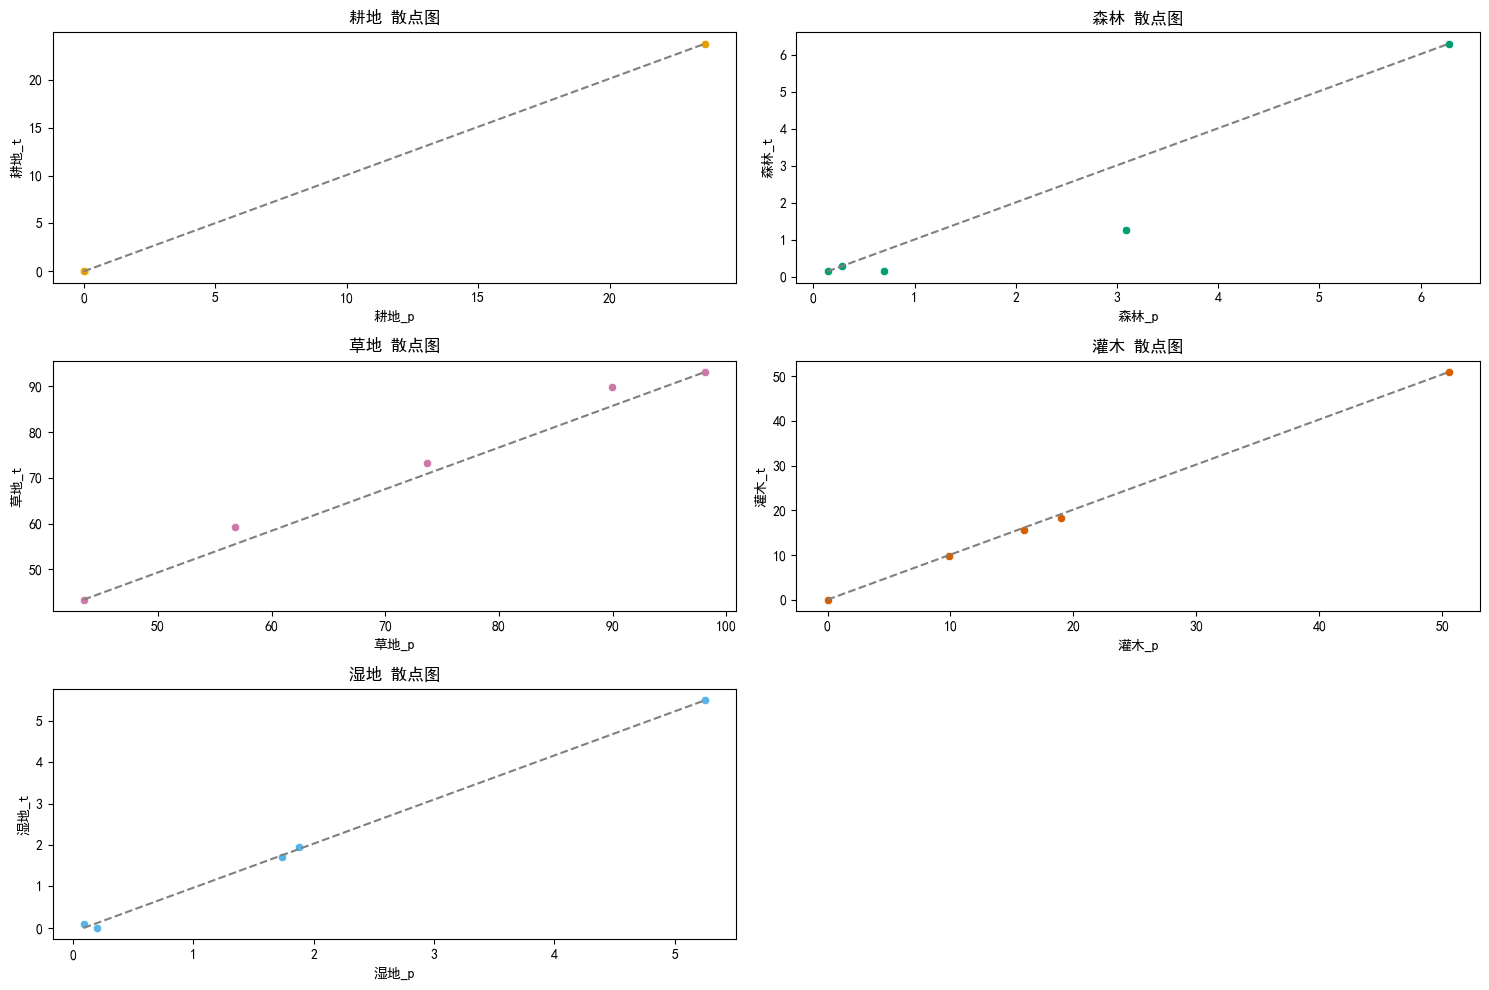

In [8]:
land_types = ['耕地', '森林', '草地', '灌木', '湿地']
colors = ['#E69F00', '#009E73', '#CC79A7', '#D55E00', '#56B4E9']  # 定义颜色列表

# 创建一个画布
plt.figure(figsize=(15, 10))  # 增加宽度以便更好地显示五个子图

# 循环绘制每个地类的散点图
for i, (land_type, color) in enumerate(zip(land_types, colors), start=1):
    plt.subplot(3, 2, i)  # 创建3行2列的子图布局
    sns.scatterplot(data=df, x=f'{land_type}_p', y=f'{land_type}_t', color=color)
    plt.plot([df[f'{land_type}_p'].min(), df[f'{land_type}_p'].max()],
             [df[f'{land_type}_t'].min(), df[f'{land_type}_t'].max()],
             color='gray', linestyle='--')  # 绘制 y=x 参考线，改为灰色虚线
    plt.title(f'{land_type} 散点图')
    plt.xlabel(f'{land_type}_p')
    plt.ylabel(f'{land_type}_t')

plt.tight_layout()  # 自动调整子图布局
plt.show()

## 空间统计分析

<Axes: >

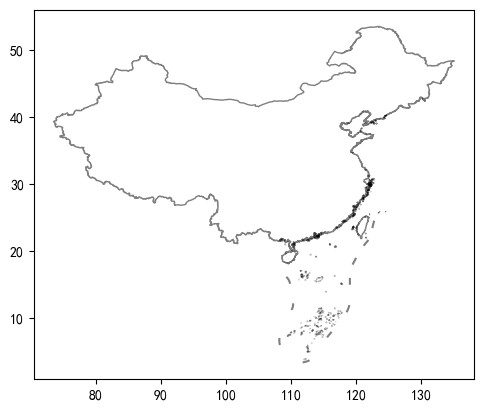

In [2]:
grid = gpd.read_file('data/矢量/grid.shp')
gdf = gpd.read_file('../../z_GIS_Data/矢量/国界/国家矢量.shp')
nine = gpd.read_file('../../z_GIS_Data/矢量/九段线/九段线.shp')
ax = gdf.boundary.plot(lw=1, color='black', alpha=0.5)
nine.plot(color='black', alpha=0.5, ax=ax)

In [23]:
er1 = pd.read_csv('data/CSV/中间数据集/df_baoyu_50.csv')
er2 = pd.read_csv('data/CSV/中间数据集/df_repe_90.csv')

### 统计

#### 数量

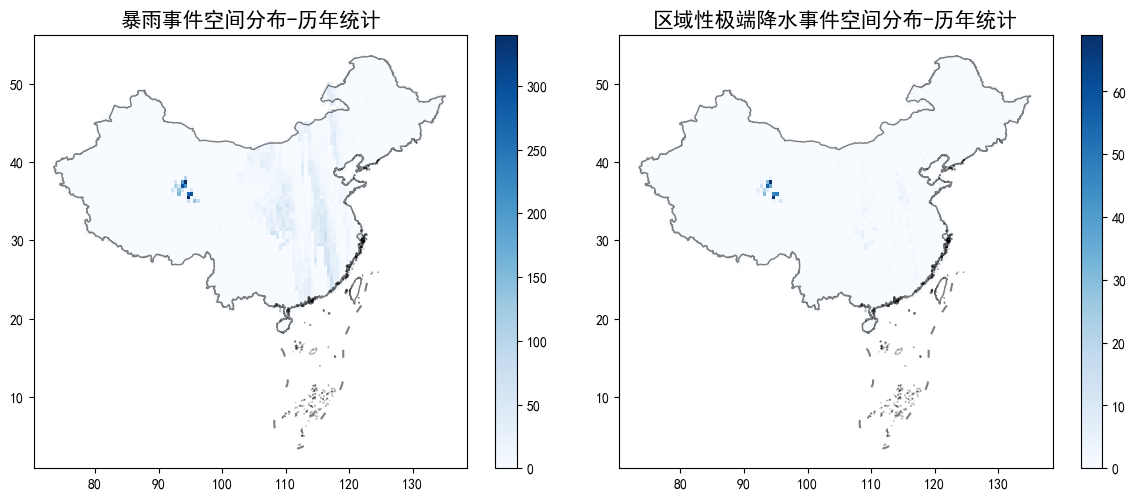

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12,4.8))

ax[0] = gdf.boundary.plot(lw=1, color='black', alpha=0.5, ax=ax[0])
nine.plot(color='black', alpha=0.5, ax=ax[0])
(grid.merge(er1.groupby('FID').size().reset_index(name='数量'), on='FID', how='left')
 .fillna(0)
 .plot(column='数量', cmap='Blues', lw=0, ax=ax[0], legend=True))
ax[0].set_title('暴雨事件空间分布-历年统计', fontsize=15)

ax[1] = gdf.boundary.plot(lw=1, color='black', alpha=0.5, ax=ax[1])
nine.plot(color='black', alpha=0.5, ax=ax[1])
(grid.merge(er2.groupby('FID').size().reset_index(name='数量'), on='FID', how='left')
 .fillna(0)
 .plot(column='数量', cmap='Blues', lw=0, ax=ax[1], legend=True))
ax[1].set_title('区域性极端降水事件空间分布-历年统计', fontsize=15)

plt.tight_layout()
plt.show()

In [5]:
grid = grid.merge(er1.groupby('FID').size().reset_index(name='数量1'), on='FID', how='left').fillna(0)
grid = grid.merge(er2.groupby('FID').size().reset_index(name='数量2'), on='FID', how='left').fillna(0)

#### DEM

In [6]:
path = 'data/CSV/DEM/'
csvs = [csv for csv in os.listdir(path) if csv.endswith('.csv')]
names = ['高程', '坡度', '山体阴影', '坡向']

C:\Users\15499\AppData\Local\Temp\ipykernel_14680\3246262832.py:16: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  plt.tight_layout()
D:\Anaconda3\envs\Math\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


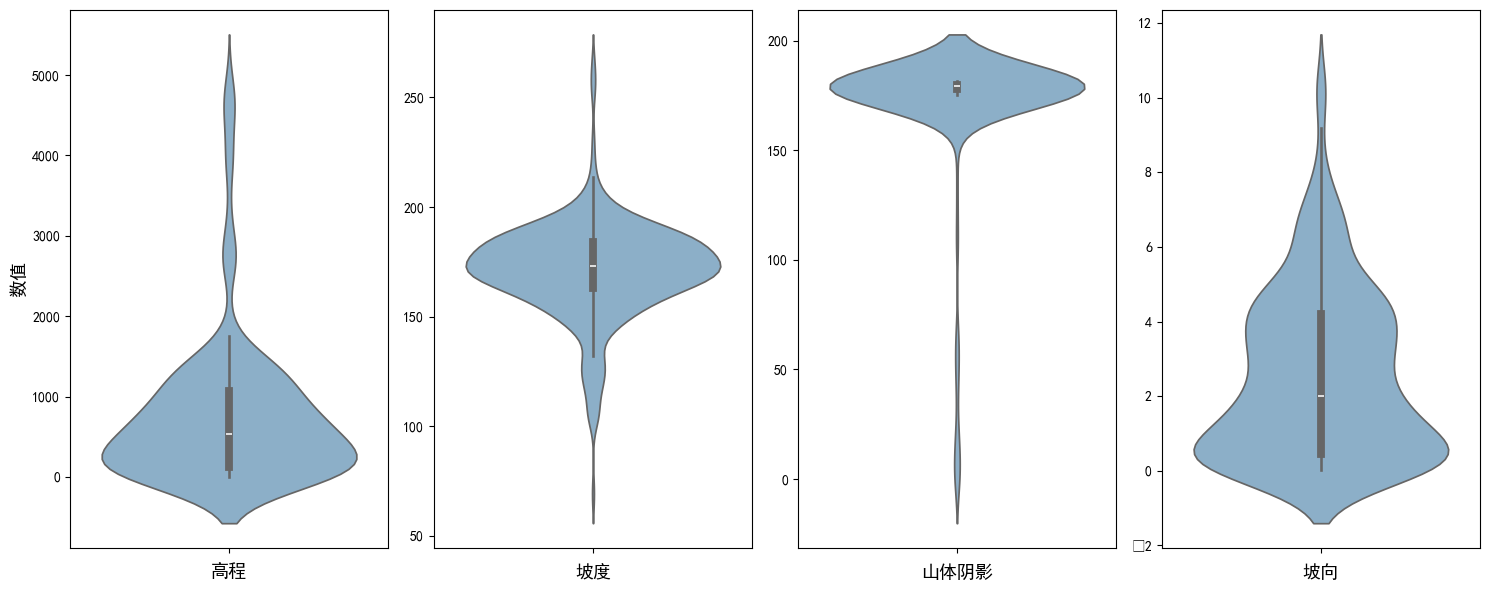

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=len(names), figsize=(15, 6))

for i, (csv, name) in enumerate(zip(csvs, names)):
    df = pd.read_csv(os.path.join(path, csv))
    df = df[df['FID'].isin(er2.FID)].copy()
    df = df[df[csv.split('.')[0]]>=0]
    df.rename(columns={csv.split('.')[0]: name}, inplace=True)

    sns.violinplot(y=name, data=df, ax=ax[i], color='#82B0D2')
    # sns.boxplot(y=name, data=df, ax=ax[i], color='#82B0D2')
    if i == 0: ax[i].set_ylabel('数值', fontsize=13)
    else: ax[i].set_ylabel('')
    ax[i].set_xlabel(name, fontsize=13)

# 调整子图间距
plt.tight_layout()
plt.show()

#### 土地利用

In [46]:
landuse1 = pd.read_csv('data/CSV/中间数据集/df_noNaN_50.csv')
landuse2 = pd.read_csv('data/CSV/中间数据集/df_noNaN_95.csv')

In [77]:
cols = ['cropland','forest','grass','shrub','wetland']
cols1 = ['耕地', '森林', '草地', '灌木丛', '湿地']
mapping_dict = dict(zip(cols, cols1))

colors = {
    'cropland': '#FFD700',  # 黄色
    'forest': '#228B22',    # 深绿色
    'grass': '#90EE90',     # 浅绿色
    'shrub': '#8B8878',     # 橄榄绿
    'wetland': '#ADD8E6'    # 蓝绿色
}

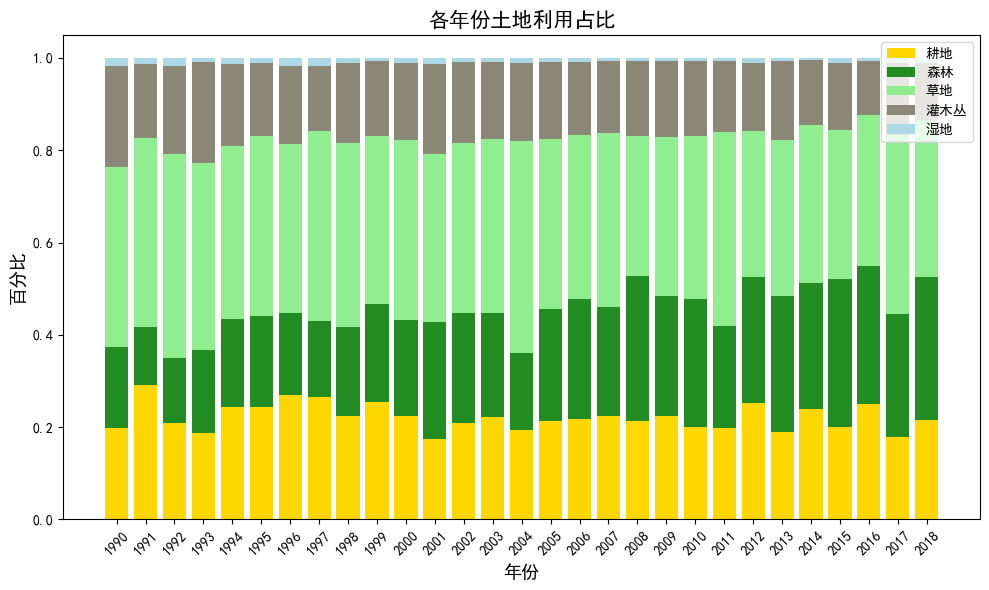

In [78]:
result = landuse1.groupby('year').agg(
    cropland=('cropland', 'mean'),
    forest=('forest', 'mean'),
    grass=('grass', 'mean'),
    shrub=('shrub', 'mean'),
    wetland=('wetland', 'mean'),
)
result_normalized = result.div(result.sum(axis=1), axis=0)

n_groups = len(result_normalized) 
bar_width = 0.8        
index = np.arange(n_groups)  

fig, ax = plt.subplots(figsize=(10,6))

bottom = np.zeros(n_groups)
for key, value in result_normalized[cols].items():
    ax.bar(index, value, bar_width, bottom=bottom, color=colors[key], label=mapping_dict[key])
    bottom += value

# 添加一些文本标签、标题和轴标签
ax.set_xlabel('年份', fontsize=13)
ax.set_ylabel('百分比', fontsize=13)
ax.set_title('各年份土地利用占比', fontsize=15)
ax.set_xticks(index)
ax.set_xticklabels(result.index)
ax.legend(loc='upper right')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.tight_layout()
plt.show()

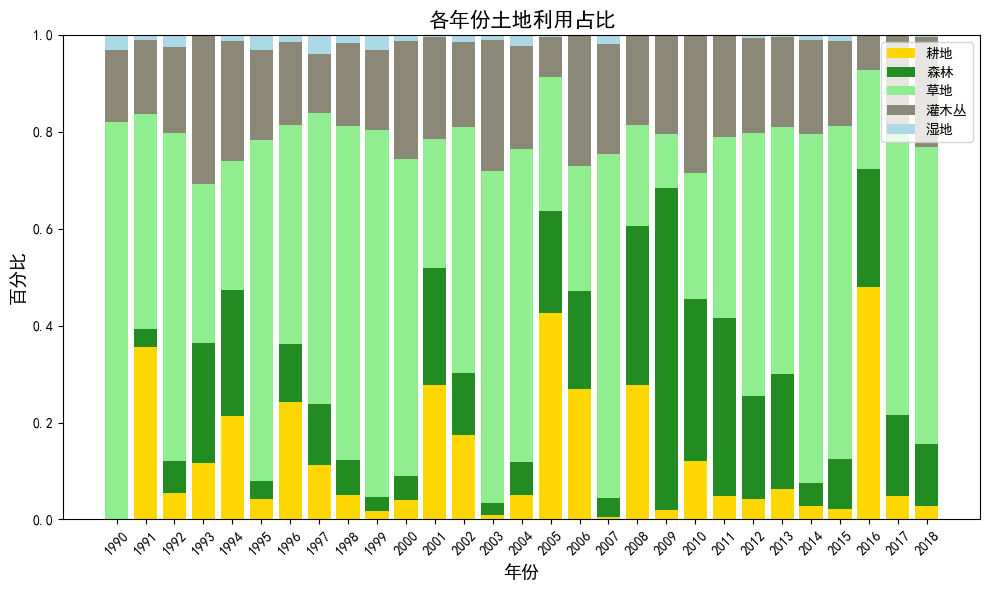

In [79]:
result = landuse2.groupby('year').agg(
    cropland=('cropland', 'mean'),
    forest=('forest', 'mean'),
    grass=('grass', 'mean'),
    shrub=('shrub', 'mean'),
    wetland=('wetland', 'mean'),
)
result_normalized = result.div(result.sum(axis=1), axis=0)

n_groups = len(result_normalized) 
bar_width = 0.8        
index = np.arange(n_groups)  

fig, ax = plt.subplots(figsize=(10,6))

bottom = np.zeros(n_groups)
for key, value in result_normalized[cols].items():
    ax.bar(index, value, bar_width, bottom=bottom, color=colors[key], label=mapping_dict[key])
    bottom += value

# 添加一些文本标签、标题和轴标签
ax.set_xlabel('年份', fontsize=13)
ax.set_ylabel('百分比', fontsize=13)
ax.set_title('各年份土地利用占比', fontsize=15)
ax.set_xticks(index)
ax.set_xticklabels(result.index)
ax.legend(loc='upper right')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.tight_layout()
plt.show()

### 空间分析

In [8]:
from libpysal.weights import Queen, KNN
from pysal.explore import esda
from splot.esda import plot_moran, plot_moran_simulation, moran_scatterplot, lisa_cluster
from splot.libpysal import plot_spatial_weights

In [9]:
k = 5
w = KNN.from_dataframe(grid, k=k)

In [10]:
m = esda.moran.Moran(grid['数量1'].values, w)

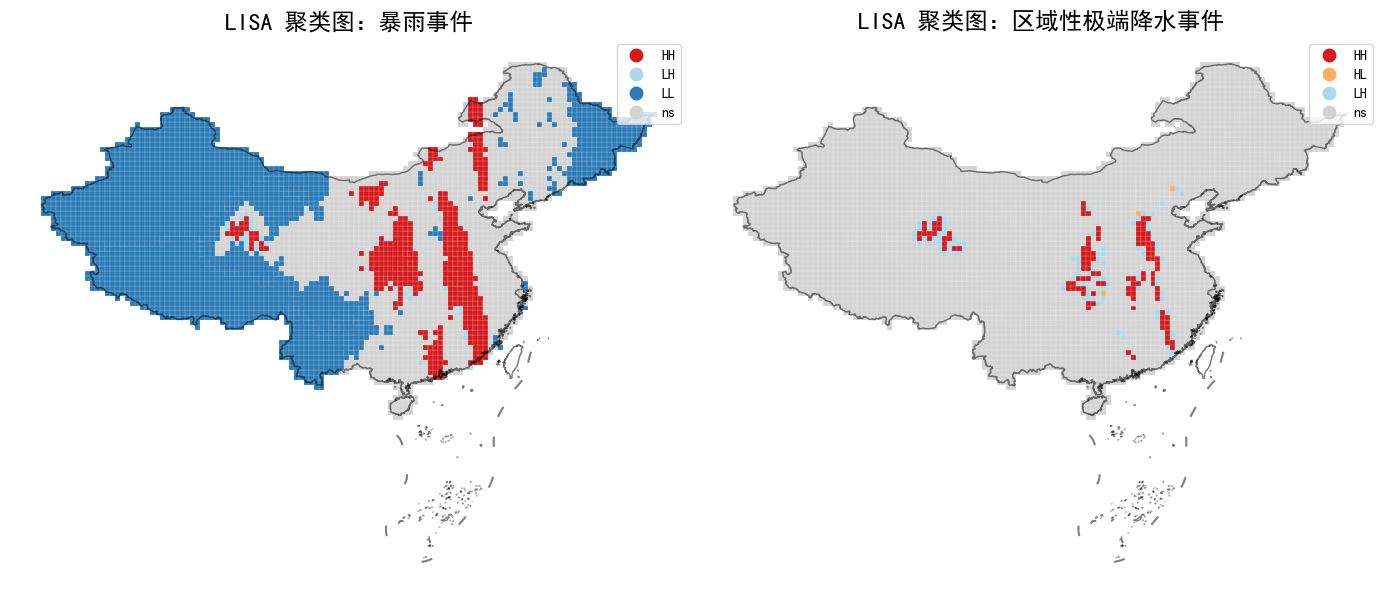

In [11]:
moran1 = esda.moran.Moran(grid['数量1'].values, w)
lisa1 = esda.moran.Moran_Local(grid['数量1'].values, w)

moran2 = esda.moran.Moran(grid['数量2'].values, w)
lisa2 = esda.moran.Moran_Local(grid['数量2'].values, w)

fig, ax = plt.subplots(1,2, figsize=(14, 8))
ax[0] = gdf.boundary.plot(lw=1, color='black', alpha=0.5, ax=ax[0])
nine.plot(color='black', alpha=0.5, ax=ax[0])
lisa_cluster(lisa1, grid, p=0.05, ax=ax[0])
ax[0].set_title('LISA 聚类图：暴雨事件', fontsize=17)

ax[1] = gdf.boundary.plot(lw=1, color='black', alpha=0.5, ax=ax[1])
nine.plot(color='black', alpha=0.5, ax=ax[1])
lisa_cluster(lisa2, grid, p=0.05, ax=ax[1])
ax[1].set_title('LISA 聚类图：区域性极端降水事件', fontsize=17)

plt.tight_layout()
plt.show()

## 时间序列

In [39]:
er1['date'] = pd.to_datetime(er1['date'])

er1['month'] = er1['date'].dt.month
er1['day'] = er1['date'].dt.dayofyear

In [27]:
er2['date'] = pd.to_datetime(er2['date'])

er2['month'] = er2['date'].dt.month
er2['day'] = er2['date'].dt.dayofyear

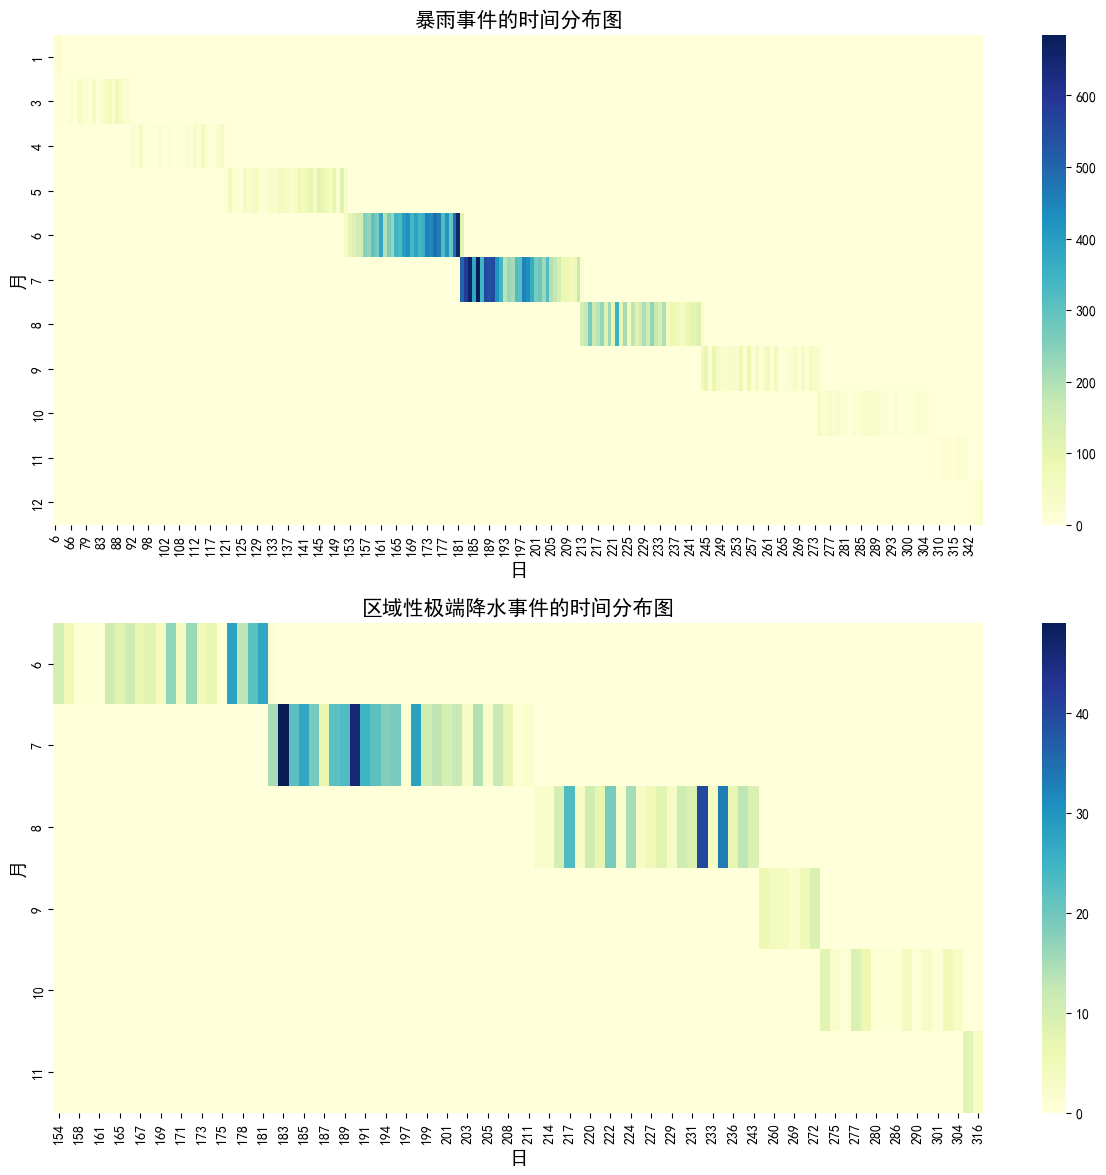

In [45]:
pivot_table1 = er1.pivot_table(index='month', columns='day', values='FID', aggfunc='count', fill_value=0)
pivot_table2 = er2.pivot_table(index='month', columns='day', values='FID', aggfunc='count', fill_value=0)

# 绘制热力图
fig, ax = plt.subplots(2,1, figsize=(15, 14))  # 设置图形大小

sns.heatmap(pivot_table1, cmap='YlGnBu', ax=ax[0])  # 使用 'YlGnBu' 色彩映射
ax[0].set_title('暴雨事件的时间分布图', fontsize=15)
ax[0].set_ylabel('月', fontsize=13)
ax[0].set_xlabel('日', fontsize=13)

sns.heatmap(pivot_table2, cmap='YlGnBu', ax=ax[1])  # 使用 'YlGnBu' 色彩映射
ax[1].set_title('区域性极端降水事件的时间分布图', fontsize=15)
ax[1].set_ylabel('月', fontsize=13)
ax[1].set_xlabel('日', fontsize=13)

plt.show()